# Parameter Learning

We will discuss how to learn the parameters and structure of probabilistic models from data.

Readings : DMU 2.3, 2.4

In [2]:
using RDatasets
using PGFPlots
using Distributions
using CrossfilterCharts

## Maximum likelihood parameter learning

The Iris dataset was used in Fisher's classic 1936 paper, <a href="http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf" rel="nofollow">The Use of Multiple Measurements in Taxonomic Problems</a>. This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

In [3]:
D = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [4]:
dc(D)

CrossfilterCharts.DCOut(150×5 DataFrames.DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species     │
├─────┼─────────────┼────────────┼─────────────┼────────────┼─────────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ "setosa"    │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ "setosa"    │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ "setosa"    │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ "setosa"    │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ "setosa"    │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ "setosa"    │
│ 7   │ 4.6         │ 3.4        │ 1.4         │ 0.3        │ "setosa"    │
│ 8   │ 5.0         │ 3.4        │ 1.5         │ 0.2        │ "setosa"    │
│ 9   │ 4.4         │ 2.9        │ 1.4         │ 0.2        │ "setosa"    │
│ 10  │ 4.9         │ 3.1        │ 1.5         │ 0.1        │ "setosa"    │
│ 11  │ 5.4         │ 3.7        │ 1.5         │ 0.2        │ "setosa"    │
⋮
│ 139 │ 6.0         │ 3.0        │ 4.8         │ 1.8        │ "virginica" │
│ 140 │ 6.9         │ 3.1        │ 5.4         │ 2.1        │ "virginica" │
│ 141 │ 6.7         │ 3.1        │ 5.6         │ 2.4        │ "virginica" │
│ 142 │ 6.9         │ 3.1        │ 5.1         │ 2.3        │ "virginica" │
│ 143 │ 5.8         │ 2.7        │ 5.1         │ 1.9        │ "virginica" │
│ 144 │ 6.8         │ 3.2        │ 5.9         │ 2.3        │ "virginica" │
│ 145 │ 6.7         │ 3.3        │ 5.7         │ 2.5        │ "virginica" │
│ 146 │ 6.7         │ 3.0        │ 5.2         │ 2.3        │ "virginica" │
│ 147 │ 6.3         │ 2.5        │ 5.0         │ 1.9        │ "virginica" │
│ 148 │ 6.5         │ 3.0        │ 5.2         │ 2.0        │ "virginica" │
│ 149 │ 6.2         │ 3.4        │ 5.4         │ 2.3        │ "virginica" │
│ 150 │ 5.9         │ 3.0        │ 5.1         │ 1.8        │ "virginica" │,[CrossfilterCharts.Dimension(:SepalLength,"function(d){return Math.round(d.SepalLength / 0.500000)*0.500000; }",0.5),CrossfilterCharts.Dimension(:SepalWidth,"function(d){return Math.round(d.SepalWidth / 0.100000)*0.100000; }",0.1),CrossfilterCharts.Dimension(:PetalLength,"function(d){return Math.round(d.PetalLength / 0.500000)*0.500000; }",0.5),CrossfilterCharts.Dimension(:PetalWidth,"function(d){return Math.round(d.PetalWidth / 0.100000)*0.100000; }",0.1),CrossfilterCharts.Dimension(:Species,"function(d){return d.Species; }",NaN)],[CrossfilterCharts.Group(CrossfilterCharts.Dimension(:SepalLength,"function(d){return Math.round(d.SepalLength / 0.500000)*0.500000; }",0.5),"SepalLength_sum","reduceSum(function(d){ return d.SepalLength; })"),CrossfilterCharts.Group(CrossfilterCharts.Dimension(:SepalWidth,"function(d){return Math.round(d.SepalWidth / 0.100000)*0.100000; }",0.1),"SepalWidth_sum","reduceSum(function(d){ return d.SepalWidth; })"),CrossfilterCharts.Group(CrossfilterCharts.Dimension(:PetalLength,"function(d){return Math.round(d.PetalLength / 0.500000)*0.500000; }",0.5),"PetalLength_sum","reduceSum(function(d){ return d.PetalLength; })"),CrossfilterCharts.Group(CrossfilterCharts.Dimension(:PetalWidth,"function(d){return Math.round(d.PetalWidth / 0.100000)*0.100000; }",0.1),"PetalWidth_sum","reduceSum(function(d){ return d.PetalWidth; })"),CrossfilterCharts.Group(CrossfilterCharts.Dimension(:Species,"function(d){return d.Species; }",NaN),"Species_count","reduceCount()")],[CrossfilterCharts.DCChart(CrossfilterCharts.Group(CrossfilterCharts.Dimension(:SepalLength,"function(d){return Math.round(d.SepalLength / 0.500000)*0.500000; }",0.5),"SepalLength_sum","reduceSum(function(d){ return d.SepalLength; })"),CrossfilterCharts.ChartType("barChart",[CrossfilterCharts.Attribute(:centerBar,"true"),CrossfilterCharts.Attribute(:gap,"")],[CrossfilterCharts.ChartType("NONE",[CrossfilterCharts.Attribute(:zoomScale,""),CrossfilterCharts.Attribute(:zoomOutRestrict,""),CrossfilterCharts.Attribute(:mouseZoomable,""),Crossfilt

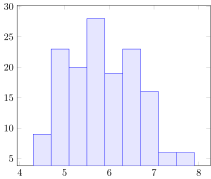

In [5]:
d = D[:SepalLength]
Plots.Histogram(d)

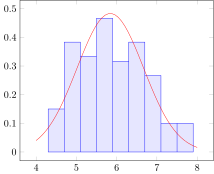

Distributions.Normal{Float64}(μ=5.843333333333335, σ=0.8253012917851409)

In [6]:
dist = fit_mle(Normal, d)
g = Axis([
    Plots.Histogram(d, density=true),
    Plots.Linear(x->pdf(dist,x), (4,8))
]
)
display(g)
display(dist)

## Bayesian parameter learning

A Bayesian Network is a graphical and condensed representation of a joint probability distribution. Each node in the network represents a random variable. Each directed edge indicates a relationship between nodes. Note that cycles are prohibited in Bayesian Networks.

Bayesian Networks reduce the number of independent parameters we need to represent a joint distribution.

In [7]:
# small helper function for plotting Beta distributions
PGFPlots.plot(d::Beta) = plot(x->pdf(d, x), (0,1));

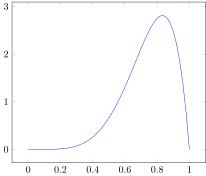

In [8]:
prior = Beta(6,2)
plot(prior)

In [9]:
prior

Distributions.Beta(α=6.0, β=2.0)

In [10]:
posterior(d::Beta, x) = Beta(d.α + sum(x .== 1), d.β + sum(x .== 0))

posterior (generic function with 1 method)

In [11]:
# The posterior function is provided by distributions.jl
post = posterior(prior, [0, 0, 1])

Distributions.Beta(α=7.0, β=4.0)

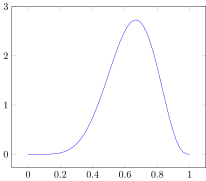

In [12]:
plot(post)

## Nonparametric parameter learning

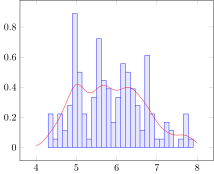

In [13]:
bandwith = 0.2
# kernel
K(x) = pdf(Normal(0,bandwith), x)
# nonparametric density function
p(x) = sum([K(x - o) for o in d])/length(d)
# plot result, comparing with histogram
g = Axis([
    Plots.Histogram(d, density=true, bins=30),
    Plots.Linear(p, (4,8))
])

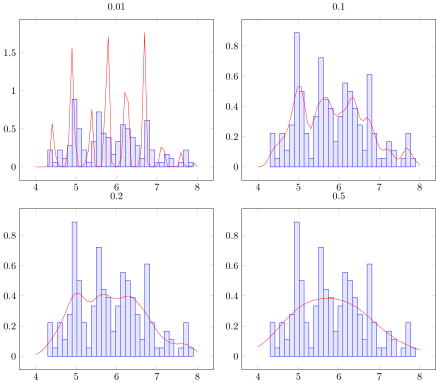

In [14]:
bandwidths = [0.01, 0.1, 0.2, 0.5]
gp = GroupPlot(2,2)
for bandwidth in bandwidths
    # kernel
    K(x) = pdf(Normal(0,bandwidth), x)
    # nonparametric density function
    p(x) = sum([K(x - o) for o in d])/length(d)
    # plot result, comparing with histogram
    g = Axis([
        Plots.Histogram(d, density=true, bins=30),
        Plots.Linear(p, (4,8))
        ], title = bandwidth)
    push!(gp, g)
end
gp

# Structure Learning

In [15]:
using BayesNets

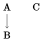

In [16]:
b = DiscreteBayesNet()
push!(b, DiscreteCPD(:A, [0.5,0.5]))
push!(b, DiscreteCPD(:B, [:A], [2], [Categorical([0.5,0.5]), Categorical([0.45,0.55])]))
push!(b, CategoricalCPD(:C, Categorical([0.5,0.5])))

In [17]:
d = rand(b, 5)

,C,A,B
1,2,1,1
2,1,1,2
3,2,1,1
4,1,2,2
5,1,2,2


In [18]:
count(b, d)

3-element Array{DataFrames.DataFrame,1}:
 2×2 DataFrames.DataFrame
│ Row │ C │ count │
├─────┼───┼───────┤
│ 1   │ 2 │ 2     │
│ 2   │ 1 │ 3     │                                        
 2×2 DataFrames.DataFrame
│ Row │ A │ count │
├─────┼───┼───────┤
│ 1   │ 1 │ 3     │
│ 2   │ 2 │ 2     │                                        
 3×3 DataFrames.DataFrame
│ Row │ A │ B │ count │
├─────┼───┼───┼───────┤
│ 1   │ 1 │ 1 │ 2     │
│ 2   │ 1 │ 2 │ 1     │
│ 3   │ 2 │ 2 │ 2     │

In [19]:
prior = UniformPrior()

BayesNets.UniformPrior(1.0)

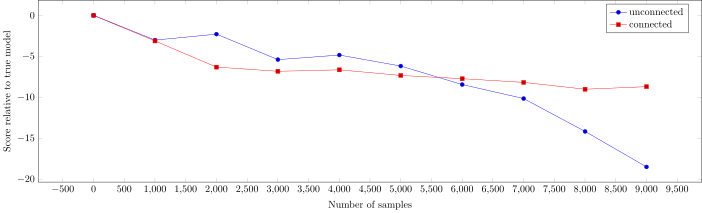

In [20]:
srand(0)

# generate a lot of data
d = rand(b, 10000);

sample_sizes = collect(1:1000:size(d,1))

# unconnected
bUnconnected = fit(DiscreteBayesNet, d, tuple())
scoreUnconnected = Float64[bayesian_score(bUnconnected, d[1:i,:], prior) for i in sample_sizes]

# fully connected
bConnected = fit(DiscreteBayesNet, d, (:A=>:B, :A=>:C, :B=>:C))
scoreConnected = Float64[bayesian_score(bConnected, d[1:i,:], prior) for i in sample_sizes]

# true
scoreTrue = Float64[bayesian_score(b, d[1:i,:], prior) for i in sample_sizes]

# plot
Axis(Plots.Plot[
    Plots.Linear(sample_sizes, scoreUnconnected - scoreTrue, legendentry="unconnected"),
    Plots.Linear(sample_sizes, scoreConnected - scoreTrue, legendentry="connected")
    ], xlabel="Number of samples", ylabel="Score relative to true model", width="25cm", height="8cm")

# Inference

Developing a probability distribution for a hidden (query) variable given a set of observations.

In [21]:
using Distributions
using PGFPlots
using BayesNets

## Inference for Classification

In [22]:
# Set uniform prior over Class
b = BayesNet()
push!(b, StaticCPD(:Class, NamedCategorical(["bird", "aircraft"], [0.5, 0.5])))

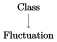

In [23]:
fluctuationStates = ["low", "hi"]
fluctuationDistributions(a::Assignment) = a[:Class] == "bird" ? NamedCategorical(fluctuationStates, [0.1, 0.9]) : 
                                                                NamedCategorical(fluctuationStates, [0.9, 0.1])
push!(b, FunctionalCPD{NamedCategorical}(:Fluctuation, [:Class], fluctuationDistributions))

In [24]:
# Function for plotting CPDs (don't worry about details here)
function plotCPD(cpd::CPD, range::Tuple{Real,Real}, assignments)
    convertAssignmentToString(a) = string(["$k = $v, " for (k,v) in a]...)[1:end-2]
    Axis(Plots.Plot[Plots.Linear(x->pdf(cpd(a), x), range, legendentry=convertAssignmentToString(a)) for a in assignments], width="25cm", height="8cm")
end;

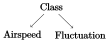

In [25]:
# if Bird, then Airspeed ~ N(45,10)
# if Aircraft, then Airspeed ~ N(100,40)
airspeedDistributions(a::Assignment) = a[:Class] == "bird" ? Normal(45,10) : Normal(100,40)
push!(b, FunctionalCPD{Normal}(:Airspeed, [:Class], airspeedDistributions))

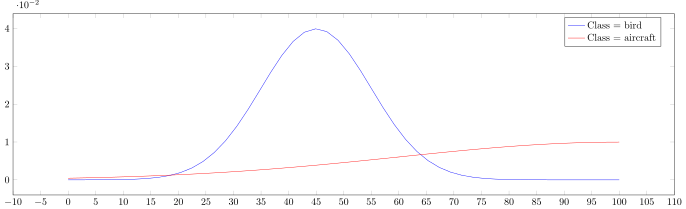

In [26]:
plotCPD(get(b, :Airspeed), (0., 100.), [Assignment(:Class=>c) for c in ["bird", "aircraft"]])

In [27]:
pb = pdf(b, :Class=>"bird", :Airspeed=>65, :Fluctuation=>"low")

0.00026995483256594033

In [28]:
pa = pdf(b, :Class=>"aircraft", :Airspeed=>65, :Fluctuation=>"low")# Probability of aircraft given data
pa / (pa + pb)

0.9189464435022358

In [30]:
# View (unnormalized) distribution as a vector
d = [pb, pa]

2-element Array{Float64,1}:
 0.000269955
 0.00306062 

In [31]:
# Now normalize
d / sum(d)

2-element Array{Float64,1}:
 0.0810536
 0.918946 

# Assignment 4

Your task is to write code for learning the parameters of an aircraft encounter model from data.
Using the provided airplane trajectories you will:

1.  Learn an initial scene model
2.  Learn an uncorrelated dynamics model

The files [initial.txt](#) and [transition.txt](#) are formatted identically to the previous assignment.
Use the provided data to learn your models.

Turn in your completed julia notebook, and any associated code files you wrote to Coursework.
Do not use any external code or Julia packages other than those used in the class materials.

In [1]:
using AA120Q

INFO: Recompiling stale cache file /home/tim/.julia/lib/v0.4/AA120Q.ji for module AA120Q.


## Load the Dataset

In [2]:
list_datasets()

1-element Array{AbstractString,1}:
 "small"

In [5]:
initial, traces = get_dataset("small")
initial

,id,A,C1,C2
1,1,4,2,2
2,2,4,2,2
3,3,2,2,2


In [8]:
traces

,id,t,n1,e1,h1,v1,ψ1,n2,e2,h2,v2,ψ2
1,1,0,-8663.356343901081,334.6189855606664,8273.006246536497,280.548,-13.715783000000005,2172.6419947992413,-4228.932261893066,1685.3174490867889,156.281,200.15960299999992
2,1,1,-8470.635911654446,381.65540917758483,8074.628853288174,280.548,-12.986118000000005,2025.9353555932234,-4175.072137739151,1685.3174490867889,154.82377,203.0110329999999
3,1,2,-8277.33211172748,426.23377933392,7876.25146003985,280.548,-12.256453000000006,1883.4309754667102,-4114.550229294595,1685.3174490867889,153.36654,205.8624629999999
4,1,3,-8083.476294029339,468.3468663329183,7677.874066791526,280.548,-11.526788000000005,1745.4250523659816,-4047.6498497688603,1685.3174490867889,151.90930999999998,208.71389299999993
5,1,4,-7889.099897995135,507.98784029615905,7479.496673543203,280.548,-10.797123000000006,1612.1960767005557,-3974.6671223066905,1685.3174490867889,150.45207999999997,211.56532299999992
6,1,5,-7694.2344474871015,545.1502722712198,7281.119280294879,280.548,-10.067458000000006,1484.0042983432368,-3895.9099236648235,1685.3174490867889,148.99484999999996,214.41675299999991
7,1,6,-7498.91154568207,579.8281352743232,7082.741887046555,280.548,-9.337793000000005,1361.0912546747822,-3811.6968069746126,1685.3174490867889,147.53761999999995,217.50006299999993
8,1,7,-7303.162869946084,612.0158052677864,6884.364493798232,280.548,-8.608128000000006,1244.0418897862185,-3721.8814658883143,1685.3174490867889,146.08038999999994,220.5833729999999
9,1,8,-7107.020166696983,641.7080620721263,6685.987100549908,280.548,-7.878463000000006,1133.0996581908555,-3626.8483054063386,1685.3174490867889,144.62315999999993,223.66668299999992
10,1,9,-6910.515246255779,668.9000902126662,6487.609707301584,280.548,-7.148798000000006,1028.4837814353486,-3526.991524269241,1685.3174490867889,143.16592999999992,226.74999299999993


## Initial Conditions Model

Here we demonstrate how to implement a simple model.

Define the encounter with $A$, $C1$, $C2$, initial speeds $v1$ and $v2$, $h_1$ and $h_2$, and the geometry parameters $r$, $\alpha$, $\beta$, where plane1 always starts at $n=0, e=0$ and facing the positive north axis and:

* $r$ is the distance of plane 2 from plane 1 at t = 0, in nautical miles
* $\alpha$ is the clockwise bearing from plane 1 to plane 2 at t = 0, in degrees
* $\beta$ is the clockwise heading of plane 2 relative to the positive north axis

![Encounter Geometry](figures/encounter_def.png)

This simple model thus defines a probability distribution as follows:

$$P(A,C1,C2,v_1,v_2,h_1,h_2,r,\beta,\alpha)$$

First, use categorical distributions for everything (**Pull Raw Data**), and discretize continuous variables into bins (**Discretize Dataset**).

Then train a discrete Bayesian network over the discrete dataset (**Fit Distributions**).
We will repeat this process for the Dynamics Model.

### Pulling the Raw Data

Develop your own initial conditions model, then write your code here to implement the data structure for the probabilty distribution. Use the following code as a starting point. You have until week 5 to work on it.

In [9]:
N = nrow(initial)
data_initial = DataFrame(
A=Array(Int, N),
C1=Array(Int, N),
C2=Array(Int, N),
v1=Array(Float64, N),
v2=Array(Float64, N),
h1=Array(Float64, N),
h2=Array(Float64, N),
r=Array(Float64, N),
α=Array(Float64, N),
β=Array(Float64, N)
)

j = 1
traceids = traces[:id]
for id in 1 : nrow(initial)
    j = findnext(traceids, id, j)
    
    delta_n = traces[j,:n2]-traces[j,:n1]
    delta_e = traces[j,:e2]-traces[j,:e1]
    
    data_initial[id, :A]  = initial[id, :A]
    data_initial[id, :C1] = initial[id, :C1]
    data_initial[id, :C2] = initial[id, :C2]
    data_initial[id, :v1] = traces[j,:v1]
    data_initial[id, :v2] = traces[j,:v2]
    data_initial[id, :h1] = traces[j,:h1]
    data_initial[id, :h2] = traces[j,:h2]
    data_initial[id, :r]  = hypot(delta_n, delta_e)
    data_initial[id, :α]  = rad2deg(atan2(delta_n, delta_e))
    data_initial[id, :β]  = traces[j,:ψ2] - traces[j,:ψ1]
end

data_initial[1:3,:]

,A,C1,C2,v1,v2,h1,h2,r,α,β
1,4,2,2,280.548,156.281,8273.006246536497,1685.3174490867889,11757.757438578696,112.83826043824205,213.87538599999993
2,4,2,2,145.52,70.9398,538.8343434403724,398.9033434403724,7922.290679837599,80.54830403348497,141.190995
3,2,2,2,217.67,161.736,1138.3925394178445,480.63253941784455,14736.086608467751,73.82401114644719,164.36618500000003


### Discretize Dataset

In [10]:
using Discretizers

D = Dict{Symbol,LinearDiscretizer}()
D[:v] = LinearDiscretizer(Float64[0,100,200,300,400,500,600]) # [ft/s]
D[:r] = LinearDiscretizer(Float64[0,10000,20000,30000,40000]) # [ft]
D[:h] = LinearDiscretizer(Float64[500,1200,3000,5000,12500]) # [ft]
D[:α] = LinearDiscretizer(Float64[-180,-120,-60,0,60,120,180]) # [deg]
D[:β] = LinearDiscretizer(Float64[-180,-120,-60,0,60,120,180]) # [deg]

data_initial[:v1] = encode(D[:v], data_initial[:v1])
data_initial[:v2] = encode(D[:v], data_initial[:v2])
data_initial[:h1] = encode(D[:h], data_initial[:h1])
data_initial[:h2] = encode(D[:h], data_initial[:h2])
data_initial[:r] = encode(D[:r], data_initial[:r])
data_initial[:α] = encode(D[:α], data_initial[:α])
data_initial[:β] = encode(D[:β], data_initial[:β])

data_initial[1:3,:]

,A,C1,C2,v1,v2,h1,h2,r,α,β
1,4,2,2,3,2,4,2,2,5,6
2,4,2,2,2,1,1,1,1,5,6
3,2,2,2,3,2,1,1,2,5,6


### Fit Distributions

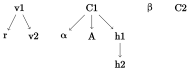

In [11]:
using BayesNets

params = GreedyHillClimbing(ScoreComponentCache(data_initial), max_n_parents=3, prior=UniformPrior())
bn_initial = fit(DiscreteBayesNet, data_initial, params)

### Sampling

(to be properly used next week)

In [12]:
rand(bn_initial)

Dict{Symbol,Any} with 10 entries:
  :A  => 2
  :r  => 1
  :C1 => 2
  :v2 => 1
  :v1 => 2
  :C2 => 2
  :α  => 5
  :h1 => 1
  :β  => 6
  :h2 => 1

## Dynamics Model

Now lets train a simple uncorrelated dynamics model. 
The probability distribution is represented here as:

$$P(\dot{v}, \dot{h}, \dot{\psi})$$

You are **strongly recommended** to add additional conditional variables, such as the current Acceleration, Climb Rate, and Turn Rate.

### Pull Raw Data

Develop your own dynamics model of probability dsitribution, then write your code here to implement the data structure for the probabilty distribution. Use the following code as a starting point. You have until week 5 to work on it.

In [14]:
M = 2*51*N # 2 aircraft per run, 51 frame-deltas per run
data_transition = DataFrame(
    dv=Array(Float64, M), # accel [ft/s2]
    dh=Array(Float64, M), # climbrate [ft/s]
    dψ=Array(Float64, M), # turnrate [deg/s]
)

j = 1
i = 0
traceids = traces[:id]
for id in 1 : N
    j = findnext(traceids, id, j)
    
    for k in 1 : 51
        i += 1
        data_transition[i, :dv] = traces[j + k, :v1] - traces[j + k - 1, :v1]
        data_transition[i, :dh] = traces[j + k, :h1] - traces[j + k - 1, :h1]
        data_transition[i, :dψ] = traces[j + k, :ψ1] - traces[j + k - 1, :ψ1]
        i += 1
        data_transition[i, :dv] = traces[j + k, :v2] - traces[j + k - 1, :v2]
        data_transition[i, :dh] = traces[j + k, :h2] - traces[j + k - 1, :h2]
        data_transition[i, :dψ] = traces[j + k, :ψ2] - traces[j + k - 1, :ψ2]
    end
end

data_transition[1:3,:]

,dv,dh,dψ
1,0.0,-198.37739324832364,0.7296650000000007
2,-1.4572300000000098,0.0,2.8514299999999935
3,0.0,-198.37739324832364,0.7296649999999989


### Fit Distribution

The following code demonstrates an alternative approach, by fitting a Multivariate Gaussian to the data (provided by Distributions.jl). This will not be a very good model, using a Gaussian Mixture would be one good way to get improvements, and including additional variables is good too.

In [15]:
# get data as a matrix
dat = convert(Matrix{Float64}, data_transition)' # each column is a sample
mvgaussian_transition = fit(MvNormal, dat)

FullNormal(
dim: 3
μ: [-0.34539738562091504,-19.448764043953297,0.282276761437909]
Σ: 3x3 Array{Float64,2}:
  0.298126    -6.71755  -0.250794
 -6.71755   3479.94     -9.93568 
 -0.250794    -9.93568   0.999165
)


### Sampling

In [16]:
rand(mvgaussian_transition) # [dv, dh, dψ]

3-element Array{Float64,1}:
  -0.64761
 -41.7968 
   1.2444 

### Saving

In [18]:
using HDF5, JLD
JLD.save(Pkg.dir("AA120Q", "data", "myencountermodel.jld"), "initial", bn_initial, 
                                 "initdisc", D,
                                 "transition", mvgaussian_transition,)